# Credit Card Fraud Detection on Imbalanced Data Using Machine Learning

## Introduction <a name="introduction"></a>

Credit card fraud detection is a crucial application of machine learning in financial systems. However, fraud cases are rare, making the dataset highly imbalanced, which poses challenges for predictive modeling. This notebook demonstrates how to effectively address these challenges using machine learning techniques.

**Objectives:**
- Detect fraudulent transactions from credit card data.
- Handle the issue of data imbalance.
- Compare model performance and select the best approach.

---

## Dataset Overview <a name="dataset-overview"></a>

The dataset used for this project contains transactions made by credit cards. It includes a highly imbalanced set of observations, where fraudulent transactions are a small fraction of the total.

**Features:**
- **V1-V28**: obfuscated features to preserve data privacy (hence encoded as v1, v2 etc.)
- **Amount**: Transaction amount.
- **Time**: Time elapsed from the first transaction.
- **Class**: Fraud status (0 for non-fraud, 1 for fraud).

---

## Exploratory Data Analysis (EDA) <a name="eda"></a>

To understand the data distribution and identify potential issues:

- Plot the distribution of features.
- Visualize the imbalance in the `Class` variable.
- Investigate correlations between features.

---

## Handling Imbalanced Data <a name="handling-imbalanced-data"></a>

Given the highly imbalanced nature of the dataset, special techniques are applied:

- **Resampling**:
  - **Oversampling**: Synthetic Minority Oversampling Technique (SMOTE).
  - **Undersampling**: Random undersampling.
  
- **Evaluation Metrics**:
  - Accuracy may not be suitable for imbalanced data. We use:
    - Precision, Recall, F1-score, and ROC-AUC.

---

## Modeling and Evaluation <a name="modeling-and-evaluation"></a>

**Let’s proceed with coding...**

### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE # type: ignore


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib

### Load and Explore the Dataset

In [ ]:
# Load dataset
# TODO: put the correct path to your csv file
# If using google colab, upload the csv file in colab, right click on the file, copy path
#  and use that path here
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Display first few rows
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [ ]:
# prompt: find out how many rows have class=1

# Assuming df is your DataFrame (as defined in the provided code)
num_fraudulent_rows = len(df[df['Class'] == 1])
print(f"Number of rows with Class = 1: {num_fraudulent_rows}")

Number of rows with Class = 1: 492


In [ ]:
# Display dataset shape
df.shape

(284807, 31)

In [ ]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [ ]:
# The data has about 2 lakh rows and 31 columns

# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Summary statistics
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

### Visualize Class Imbalance
Use seaborn to visualize the distribution of the target variable to understand class imbalance.

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

##### <font color="teal">The "Class" column (0 means it is not a fraud transaction and 1 means it is a fraud transaction) has  class imbalance.<strong>There are only 492 fraud transactions out of 284,807 transactions.<strong></font>   


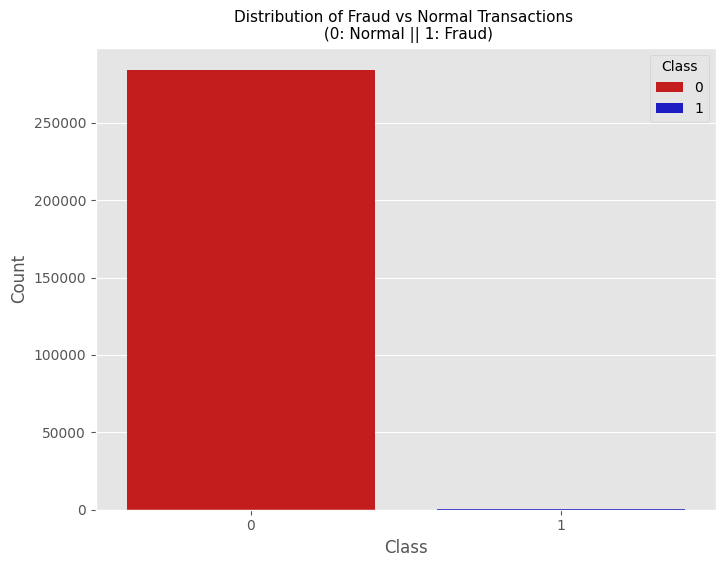

In [ ]:
# Visualize the distribution of the target variable
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Data Preprocessing
- Check for missing or null values.
- Handle duplicates.
- Scale the features (`Amount`, `Time`).
- Split features and target.


In [ ]:
# Check for missing values
df.isnull().sum().sum()

0

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

1081

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(283726, 31)

In [ ]:
# Standardize 'Amount' and 'Time'
# We will standardize the 'Amount' and 'Time' columns as the other columns are already standardized
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [ ]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996823  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996802 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996802 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996781 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28    Amount  Class  
0 -0.021053  0.244200      0  
1  0.014724 -0.342584      0  
2 -0.059752  1.158900      0  
3  0.061458  0.139886      0  
4  0.215153 -0.073813      0

In [ ]:
# Split features and target
# Remove the target variable from the features as the model should not have access to it.
# We will pass it separately to the model as Y, so that model can learn to predict it
X = df.drop('Class', axis=1)
y = df['Class']

### Step 7: Investigate Correlations Between Features

Correlation analysis helps to understand how features in the dataset relate to each other. High correlation between features might indicate redundancy, while low correlation can suggest that features capture different aspects of the data.

Let's calculate and visualize the correlation matrix.


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

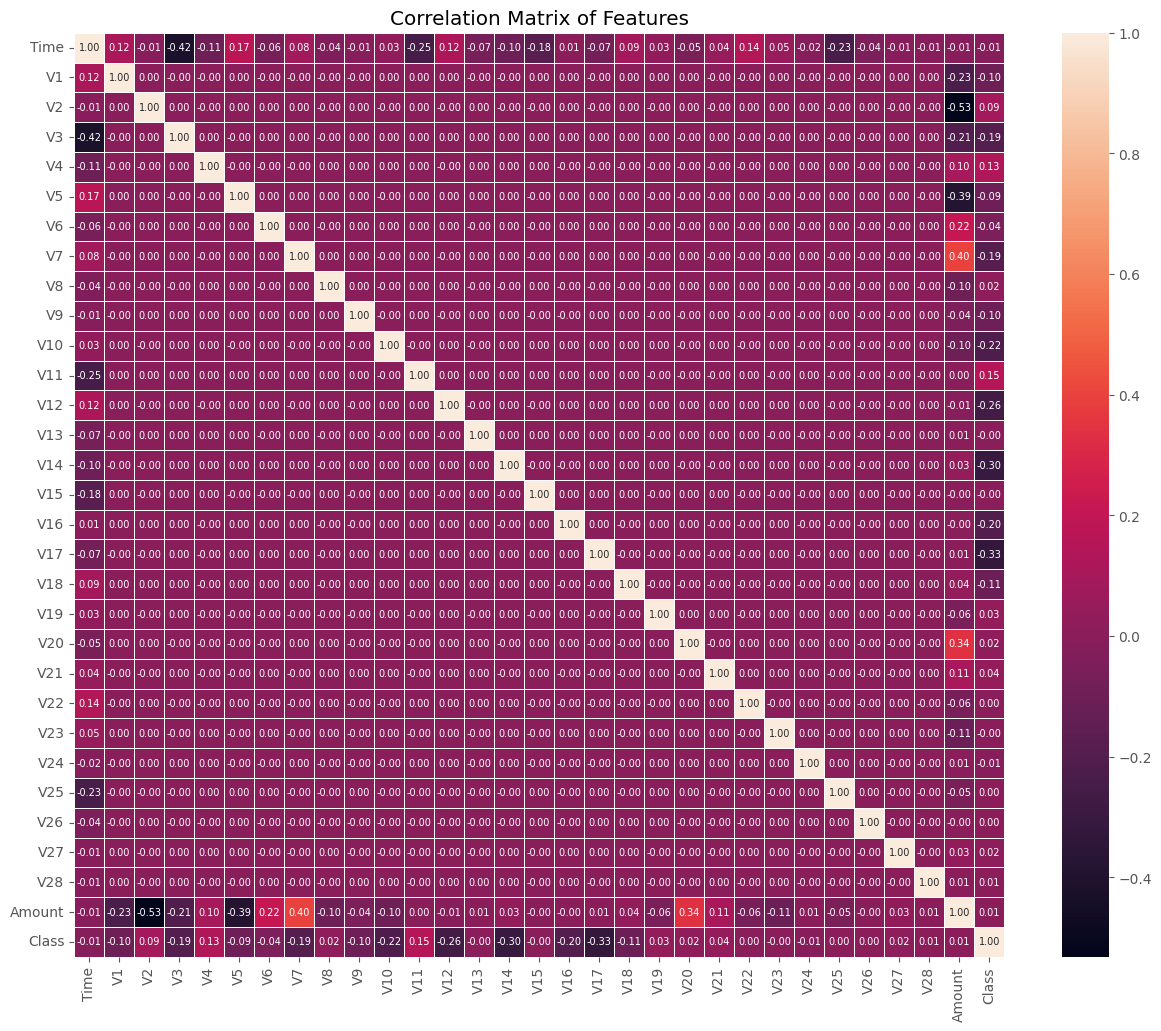

In [ ]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

### Split Data into Training and Test Sets

In [ ]:
# Train-test split with imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shape
X_train.shape

(227845, 30)

In [ ]:
X_test.shape

(56746, 30)

### Train and Evaluate Model on Imbalanced Data
Train a model and evaluate its performance on the imbalanced dataset.

In [ ]:
# create an instance of the model we want to use.
# Note that this is barebones model, it will need to be TRAINED on the data for it to LEARN the patterns in our data
# and be able to do the right predictions

# Assignment part 1: Create a RandomForestClassifier model and observe if the results are better than LogisticRegression
# submit classification report, confusion matrix, roc_auc_score, roc_curve for both models
# Put them in a word document and create pdf of the word document and submit it
# You can play with other models such as GradientBoosting, XGBoost, etc. and see if you can get better results
model = LogisticRegression()

In [ ]:
# TRAIN the model on the training dataset
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

### Evaluate model


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")


Confusion Matrix:
[[56854    10]
 [   39    59]]



In [ ]:
# Accuracy
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")



Accuracy: 0.9991397773954567



In [ ]:
# Classification report
clf_report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{clf_report}\n")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962




##### <font color='teal'> <strong> Recall = 0.53 (Only 53% of actual fraudulent transactions were detected by the model, meaning nearly half of the fraudulent transactions were missed).</strong></font>

In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)


In [ ]:
print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")

ROC-AUC Score (Imbalanced Data): 0.7666137155229219



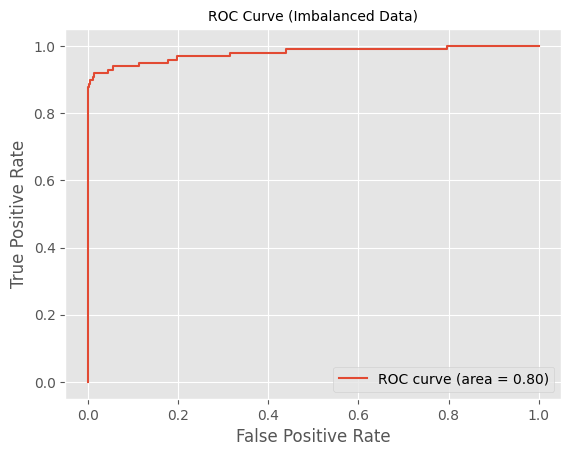

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Imbalanced Data)', fontsize=10)
plt.legend(loc='best')
plt.show()

### Handling Imbalanced Data
Two techniques:
- Undersampling
- Oversampling

#### Undersampling

In [ ]:
# Separate normal and fraud transactions
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (283253, 31)
Fraud transactions shape: (473, 31)


In [ ]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

In [ ]:
# Print the shape of the new normal transactions
print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (473, 31)


In [ ]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_df = pd.concat([normal_sample, fraud], ignore_index=True)

In [ ]:
# Print few rows of new df
new_df.head()

Time        V1        V2        V3        V4        V5        V6  \
0  1.385143 -0.593076 -0.490089 -0.732502 -4.863246  2.226071  3.047194   
1 -0.401805  1.152391  0.042397  1.306045  1.333288 -0.889597 -0.175308   
2 -0.681306 -5.071344 -1.077879 -1.486864 -3.182460  0.625664 -2.582681   
3 -0.842781  1.241609 -0.705009  0.508800 -0.871227 -0.813950  0.048734   
4 -0.341275 -0.577230  1.172058  1.366728 -0.195313  0.304772 -0.762738   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.169629  0.740577 -0.272373 -1.387715 -0.157754  0.007640 -0.086713   
1 -0.489085  0.032144  0.734749 -0.232473 -0.613151  1.032874  1.068623   
2 -0.124658  0.110157  3.484243  0.285413 -0.384399  0.891704 -0.884975   
3 -0.754527  0.103672 -1.016314  0.693392  1.521763  0.411823  0.746352   
4  0.974543 -0.019375 -0.960417 -0.174834  1.319390  0.626043 -0.180659   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.413685  1.375846 -2.831990  0.055648  1.627840  0.057270 -0.265111   
1 -0.565510  0.064830  0.029336 -0.307046 -0.189541 -0.218765 -0.066424   
2  0.044352  0.470310 -0.979422 -0.018404 -0.898114 -0.759284 -0.703835   
3 -0.121075  0.428171  1.296265  0.047403 -1.331775  0.558694  0.199236   
4  0.542796 -0.105676  0.134364 -0.500201 -0.184970  0.544072  0.110933   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.010148  0.466642 -0.513593  0.728620  1.243509 -0.363955  0.083329   
1 -0.050114  0.111177 -0.017129  0.424390  0.449725 -0.412800  0.079122   
2 -0.587064  0.186235 -1.945554  0.274181  0.111906 -1.006022  1.905327   
3  0.084513  0.050395  0.027801 -0.293088  0.184833 -0.386075  0.024313   
4 -0.329453 -0.947751 -0.025060  0.295141 -0.198305 -0.054280  0.278054   

        V28    Amount  Class  
0  0.046203 -0.143022      0  
1  0.040675 -0.313431      0  
2  0.261755 -0.042024      0  
3  0.017243 -0.121697      0  
4  0.156474 -0.342185      0

In [ ]:
# Check new class distribution
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [ ]:
# Split new df into X and y
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Train test split on Undersampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model with undersampled data
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
clf_report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{clf_report}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        88
           1       0.97      0.91      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190




In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")

ROC-AUC Score (Imbalanced Data): 0.9388368983957218



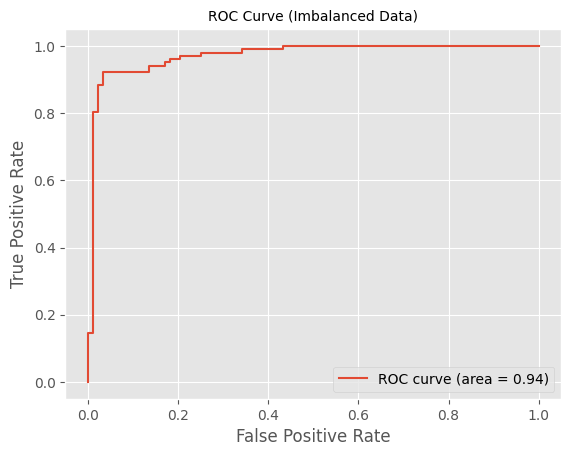

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Imbalanced Data)', fontsize=10)
plt.legend(loc='best')
plt.show()

##### <font color='teal'>Observe how the F1 score for fraudulent transactions <strong>has improved significantly (from 53 to 95)</strong> and RoC curve is more L shaped </font>

#### Oversampling
- Use `SMOTE` to balance the dataset by oversampling the minority class

In [ ]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Check new class distribution
y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Train models with oversampled data
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
clf_report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{clf_report}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302




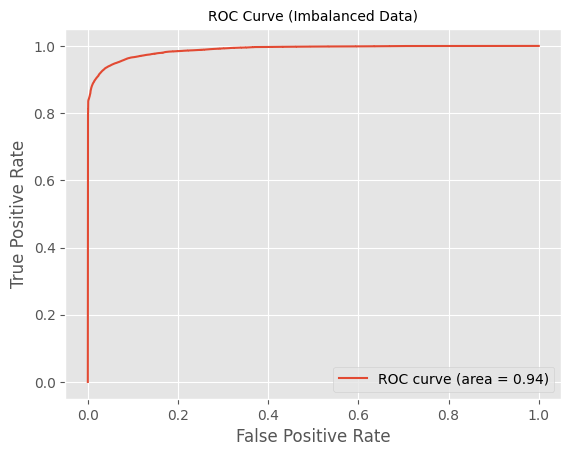

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Imbalanced Data)', fontsize=10)
plt.legend(loc='best')
plt.show()

<font color='teal'><strong>Note that both oversampling and undersampling have given significant improvements in F1 score</strong></font>

### Save the Trained Model (Decision Tree Classifier)

In [ ]:
# Save the model
joblib.dump(model, "credit_card_model.pkl")

['credit_card_model.pkl']

### Load the Model

In [ ]:
# Load the model
model = joblib.load("credit_card_model.pkl")

In [ ]:
# Predict with a sample unseen (new) data which is not in the dataset
# mimics a production scenario where new data comes in and the model is used to predict
# Note that in the delpoyment, only the pkl file will be used to make predictions
pred = model.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("\n\nNormal Transaction\n\n")
else:
    print("\n\nFraud Transaction\n\n")



Normal Transaction




C:\Users\vijay\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<font color='teal'>Note the prediction above. You can ignore the warning as we have used the column names (feature names) when passing the X_tran and y_train to the model (as a bonus you can try removing them from the data and rerunning)

Hint: use X_train.values and y_train.values</font>